## Rozkład LU

In [17]:
f = open('RURL_dane2.txt', 'r')
for i, line in enumerate(f):
    if i == 0:
        size = int(line[0])
        A = [[0 for x in range(size+1)] for y in range(size)]
        B = [0 for x in range(size)]
    else:
        for j in range(size):
            A[i-1][j] = float(line.split()[j])
        B[i-1] = float(line.split()[size])
f.close()

### 𝐴 = 𝐿 × 𝑈 
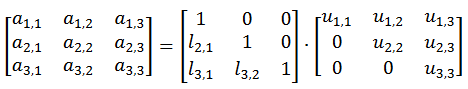

In [18]:
L = [[0 for x in range(size)] for y in range(size)]
U = [[0 for x in range(size)] for y in range(size)]

for i in range(size):
    if A[i][i] == 0:
        print("0 na przekatnej")
        break
    else:
        for j in range(size):
            val = A[i][j]
            for k in range(i):
                val-=L[i][k]*U[k][j]
            if i<=j:
                if i == j:
                    L[i][j] = 1
                U[i][j] = round(val,3)
            else:
                L[i][j] = round(val/U[j][j],3)

print("A")
for i in range(size):
    for j in range(size):
        print(float(A[i][j]),end="\t")
    print()
print("\nL")
for i in range(size):
    for j in range(size):
        print(float(L[i][j]),end="\t")
    print()
print("\nU")
for i in range(size):
    for j in range(size):
        print(float(U[i][j]),end="\t")
    print()

A
1.0	1.0	-2.0	1.0	-2.0	-5.0	
2.0	-4.0	-1.0	2.0	3.0	3.0	
2.0	-2.0	6.0	-1.0	6.0	5.0	
0.0	2.0	1.0	1.0	4.0	5.0	
-5.0	0.0	4.0	-1.0	9.0	4.0	
7.0	-2.0	-4.0	5.0	3.0	-1.0	

L
1.0	0.0	0.0	0.0	0.0	0.0	
2.0	1.0	0.0	0.0	0.0	0.0	
2.0	0.667	1.0	0.0	0.0	0.0	
0.0	-0.333	0.25	1.0	0.0	0.0	
-5.0	-0.833	-0.438	1.535	1.0	0.0	
7.0	1.5	0.688	0.037	-5.232	1.0	

U
1.0	1.0	-2.0	1.0	-2.0	-5.0	
0.0	-6.0	3.0	0.0	7.0	13.0	
0.0	0.0	7.999	-3.0	5.331	6.329	
0.0	0.0	0.0	1.75	4.998	7.747	
0.0	0.0	0.0	0.0	-0.506	-19.291	
0.0	0.0	0.0	0.0	0.0	-91.072	


### 𝐿 × 𝑌 = 𝐵
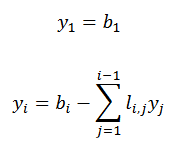

In [19]:
Y = [0 for x in range(size)]
Y[0] = B[0]
for i in range(size):
    Y[i] = B[i]
    for j in range(i):
        Y[i] -=L[i][j]*Y[j]
    Y[i] = round(Y[i],3)    #zaokrąglenie wartości
print("Y")
for i in Y:
    print(i, end="\t")

Y
8.0	-15.0	-0.995	0.254	36.679	154.08	

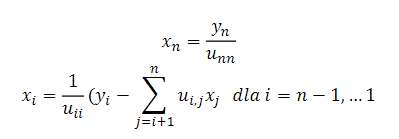

In [20]:
X = [0 for x in range(size)]
X[size-1] = round(Y[size-1]/U[size-1][size-1],3)
for i in range(size-2,-1,-1):
    X[i] = Y[i]
    for j in range(i+1,size):
        X[i] -=U[i][j]*X[j]
    X[i]/=U[i][i]
    X[i]=round(X[i],3)

print("X")
for i in X:
    print(i, end="\t")

X
-9.455	-1.504	17.946	30.429	-7.981	-1.692	